<a href="https://colab.research.google.com/github/erika-munho/TalentoTech/blob/main/U1_L2__Actividad_2_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring the *Titanic* dataset with `seaborn`

<div style="width:100%; text-align:center">
<img src=http://blogs.westword.com/showandtell/titanic.jpg width=500px>
</div>

Kaggle has a nice [dataset](https://www.kaggle.com/c/titanic-gettingStarted) with information about passengers on the *Titanic*. It's meant as an introduction to predictive models -- here, predicting who survived the sinking. Let's explore it using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). This notebook mostly demonstrates features in development for version 0.3. Please [get in touch](https://github.com/mwaskom/seaborn/issues/new) if you have ideas for how they could be improved.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

First we load in the data and take a look

In [3]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's do  little bit of processing to make some different variables that might be more interesting to plot. Since this notebook is focused on visualization, we're going to do this without much comment.

In [5]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [6]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Finally set up a palette dictionary for some of the plots.

In [8]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

##Who were the *Titanic* passengers?

Before getting to the main question (who survived), let's take a look at the dataset to get a sense for how the observations are distributed into the different levels of our factors of interest.

###How many men, women, and children are in our sample?

First let's count the number of males and females, ignoring age.

In [9]:
!pip install seaborn

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [12]:
titanic = sns.load_dataset("titanic")

In [13]:
# Definir la paleta pal
# 'man': #4682B4 (un tono de azul acero)
# 'woman': #CD5C5C (un tono de rojo)
# 'child': #2E8B57 (un tono de verde mar)
# 'male': #6495ED (un tono de azul claro)
# 'female': #F08080 (un tono de rosa claro)
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

<ipython-input-14-85d71c1f3b1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=titanic, palette=pal)


<Axes: xlabel='sex', ylabel='count'>

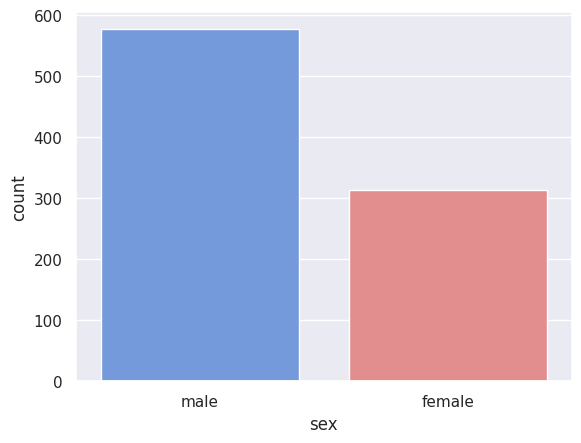

In [14]:
#Usar countplot con la paleta pal
#Se remplazo factorplot por countplot
#Se indica la variable x para "sex"
sns.countplot(x="sex", data=titanic, palette=pal)


Los datos indican que de el total de pasajeros aproximadamente 580 individuos eran hombres, y al rededor de 320 pasajeros eran mujeres, además se puede inferir que el número de hombres duplica el número de las mujeres que viajaban en en el Titanic

*****Then we can look at how this is distributed into the three classes.

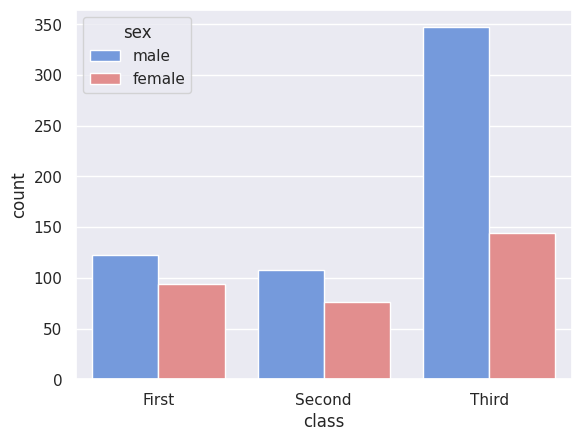

In [15]:
sns.countplot(x="class", data=titanic, hue="sex", palette=pal);

Al realizar la comparativa entre el número de hombres y mujeres que viajaban en primera, segunda y tercera clase, es ésta última dondes se ubican el mayor número de hombres y mujeres viajando en el trasatlántico, siendo muy notable la cantidad de hombres localizados en tercera clase, cuyo número de indiviiduos es cercano a los 350, para el caso de las mujeres en tercera clase se observa una cantidad relativamente superior en comparación a las clases primera y segunda, cuyo número se acerca las 150 viajando en tercera clase.

Por otra parte es en la primera clases, donde se ubica el segundo grupo, con el mayor número de pasajeros, para el caso de los hombres, el número está sobre los 140 y las mujeres pueden sumar al rededor de 90 personas.

Finalmente es la tercera clase, la que alberga el menor número de personas de ambos sexos, hombres 115 aproximadamente y mujeres 75.

--------------------------------------

**We also have a separate classification that splits off children (recall, this is going to be relevant because of the "women and children first" policy followed during the evacuation).**

<ipython-input-16-2ebde7a8f8ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="who", data=titanic, palette=pal);


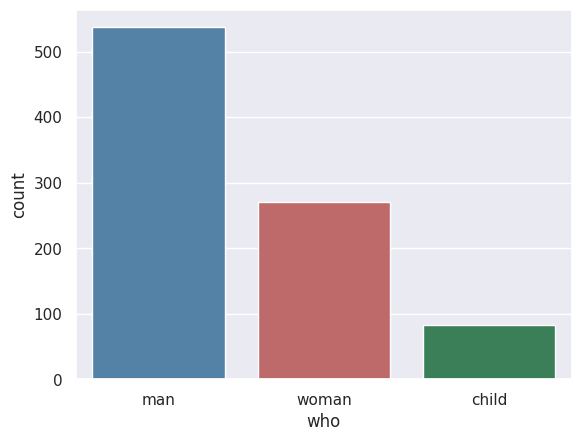

In [16]:
sns.countplot(x="who", data=titanic, palette=pal);

En relación al número de personas clasificadas según el sexo como hombre y mujer ambos mayores de edad y los menores de edad identificados como chico(a), se observa que los hombres mayores de edad concentran el mayor número de pasajeros, 550 aproximadamente, entre tanto las mujeres tambien mayores de edad representan el 50% de los pasajeros hombres, con un numero cercano a los 270 y finalmente los pasajeros menores de edad es bastante inferior a los dos grupos poblacionales identificados previamente, cuyo número está sobre las 80 personas.

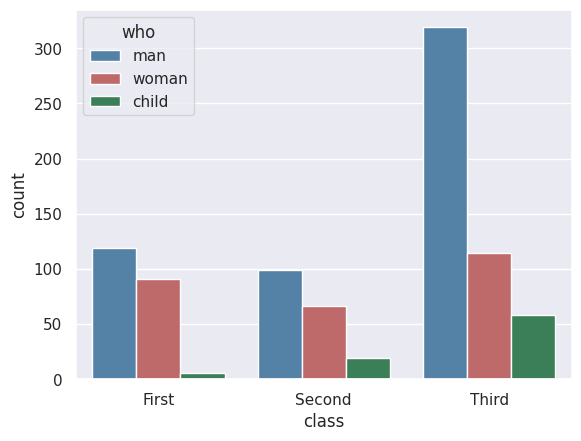

In [17]:
sns.countplot(x="class", data=titanic, hue="who", palette=pal);

Realizando la comparativa entre adultos hombres, adultas mujeres y personas menores de edad, organizadas por clase de pasajero, se observa que la tercera clase agrupa el mayor número para los tres tipos poblacionales mencionados. En el caso de los hombres en tercera clases, el número alcanza los 340 pasajeros aproximadamente, el cual triplica la cantidad de personas que viajaban en primera clase, 140 aproximadamente y 100 personas en segunda clase.

Con respecto a las mujeres, el número es moderadamente superior para quienes viajaban en tercera clase, cantidad que está sobre las 130 personas, para el caso de la primera clase agrupa a 80 mujeres aproximadamente y para la segunda clase se estima en 140 personas del género femenino.

Finalmente para el caso de las y los menores de edad,  éste es el grupo de pasajeros con menor número de personas vijando en el trasatlántico en comparación con los otros dos grupos poblacionales. Se observa que en tercera clase estaban viajando 70 personas, 40 menores de edad aproximadamente en segunda clase y finalmente tan solo 10 personas en primera clase.

--------------------------------------

**Finally, we made a variable that indicates whether a passanger was an adult male.**

<ipython-input-18-608348c92fdf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="adult_male", data=titanic, palette="Blues");


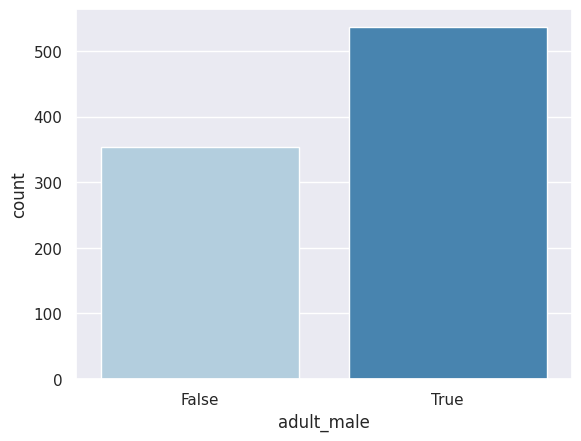

In [18]:
sns.countplot(x="adult_male", data=titanic, palette="Blues");

En relación a la cantiad de adultos hombres que viajaban en el Titanic, la gráfica muestra que al rededor de 560 personas integraban este grupo, por su parte al rededor de 360 inviduos estaban integrados por mujeres y menores de edad.

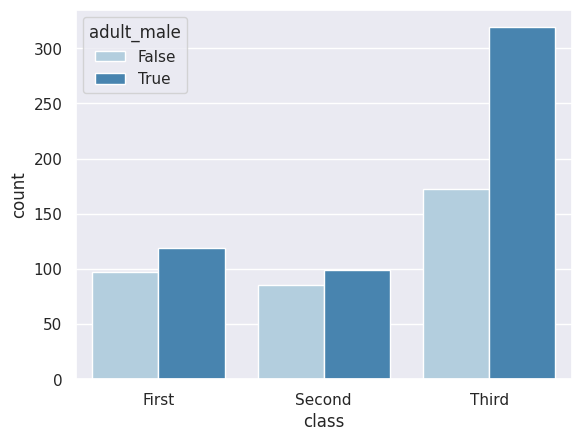

In [19]:
sns.countplot(x="class", data=titanic, hue="adult_male", palette="Blues");

Next let's look at the distribution of ages within the groups we defined above.

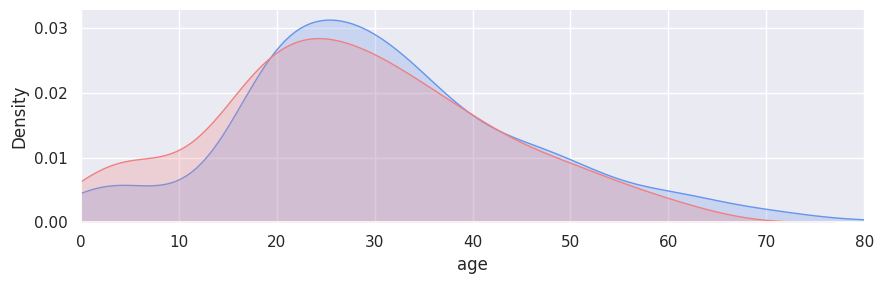

In [20]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
# en el codigo anterior se cambio shade=True por fill=True
fg.set(xlim=(0, 80));

El histográma muestra que la distribución de edades para hombres y mujeres es muy similar, se obseva asimetría en las gráficas, lo cual indica que los datos no están distribuidos normalmente. La asimetría con tendencia hacia el lado derecho muestra que el mayor número de viajeros, tanto de mujeres como de hombres, se concentra en las edades entre los 25 y los 35 años, se observa una mayor concentración para el caso de los hombres,  teniendo en cuenta, además, que la dispersión de los datos va desde cero hasta los 80 años en el caso de los hombres y  70 años en el caso de las mujeres, este grupo con una menor despersión. La media de edad para el caso de los hombres está sobre los 26-27 años y para las mujeres oscila entre los 22-23 años.

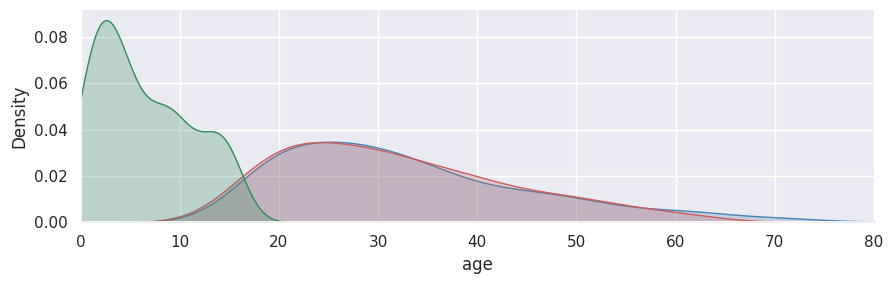

In [21]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
# en el codigo anterior se cambio shade=True por fill=True
fg.set(xlim=(0, 80));

En la gráfica anterior al comparar  los viajeros por edades y géneros se observa que las edades de las personas menores de edad, cuya despersión va de los cero a los 20 años presentan una distribución con tendencia multimodal ya que se observa una elevada concentración de datos al rededor de las edades de 1-2 años, pero las edades de 8 y 15 años, presenta cada una un pico que sobresalen levemente en la distribución. Para el caso de los hombres y mujeres mayores de edad la distribución es muy similar, con asimetría hacia la derecha, los datos se concentran al rededor de la media que alcanza los 24 años.

----------------------------------

###How many first, second, and third class passengers are in our sample?

Although have some information about the distribution into classes from the sex plots, let's directly visualize it and then see how the classes break down by age.

<ipython-input-22-bd2ffcf69f4b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=titanic, palette="BuPu_d");


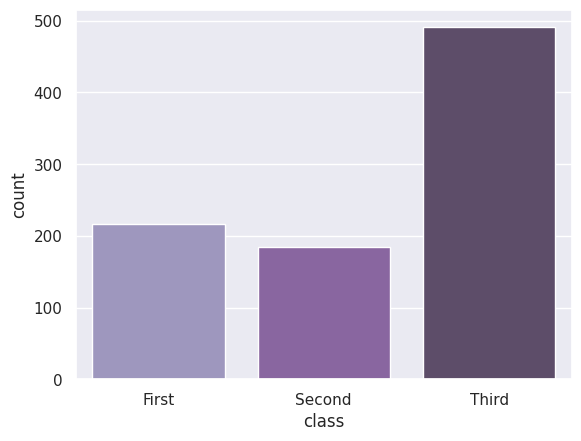

In [22]:
sns.countplot(x="class", data=titanic, palette="BuPu_d");

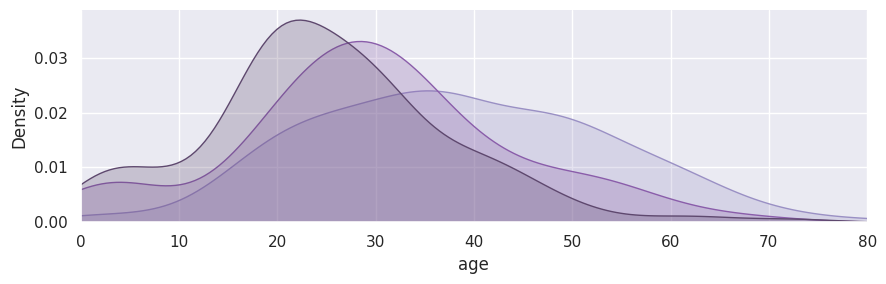

In [23]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0, 80))

Al comparar la distribució de edades por clase de pasajero, se observa que para el caso de la primera clase una distribución normal ya que edades se distribuyen de manera homogenea al rededor de la media que alcanza los 37-38 años y la distribución va de cero a 80 años. La segunda clase presenta una mayor concentración de datos, con una distribución asimétrica hacia la derecha, ya que las edades se concentran al rededor de la media que alcanza los 29 años; y para el caso de la tercera clase, la concentración de las edades es aún mayor,en comparación con las clases uno y dos, ya ésta (clase 3) alverga un mayor número de pasajeros, la curva de distribución de las edades tambien presenta asimetría hacia la derecha, concentrando los datos al rededor de la media que alcanza los 21 años aproximadamente.

-----------------------

Finally let's look at the breakdown by age and sex.

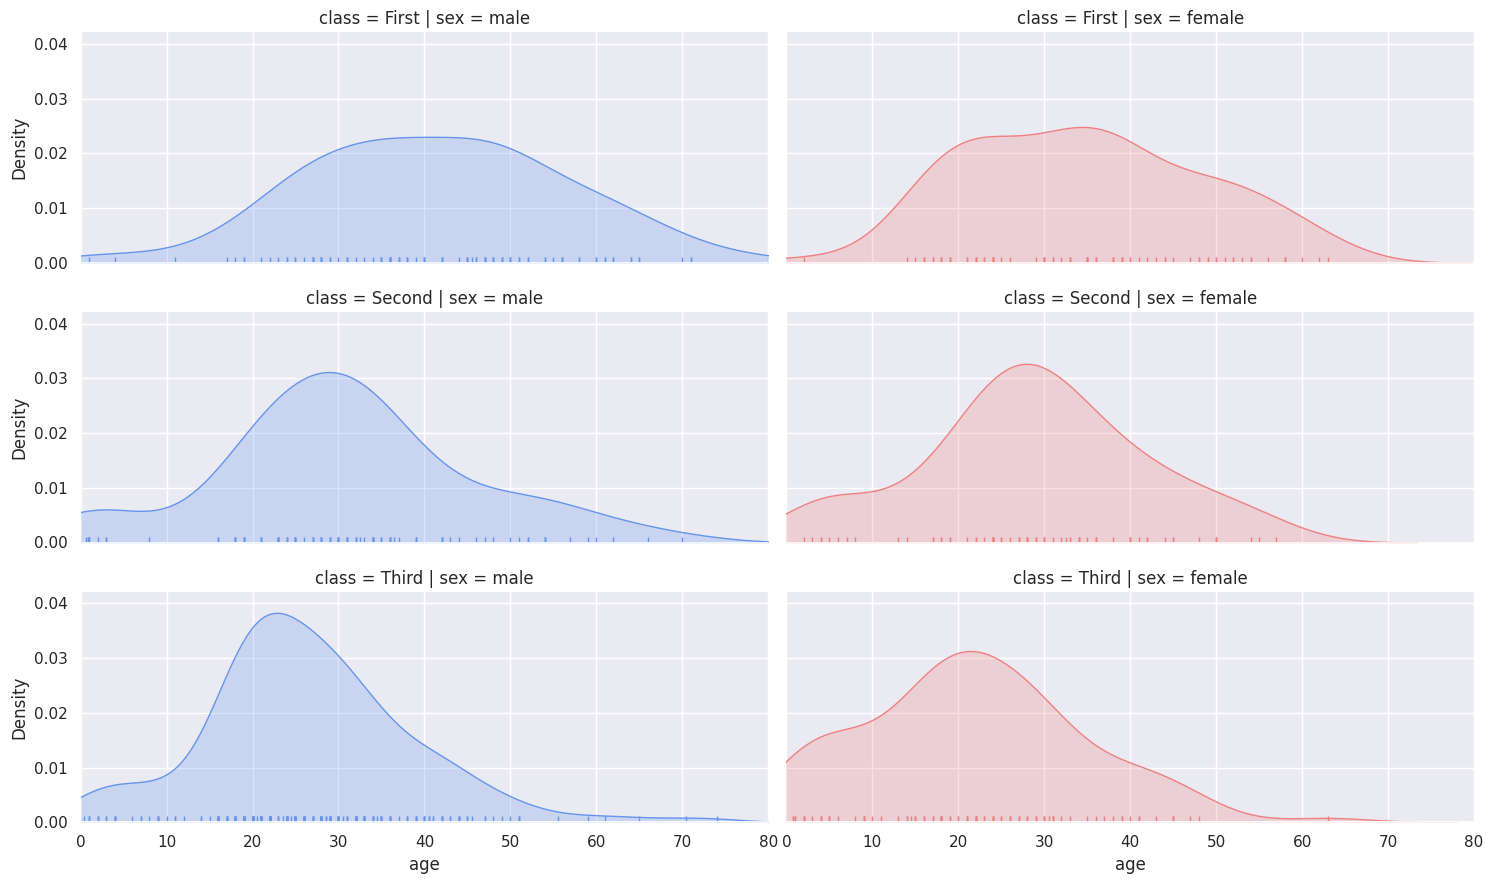

In [24]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

###Where were our passenger's cabins?

We also have information about what deck each passgener's cabin was on, which may be relevant.

<ipython-input-25-c05932f79679>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="deck", data=titanic, palette="PuBu_d");


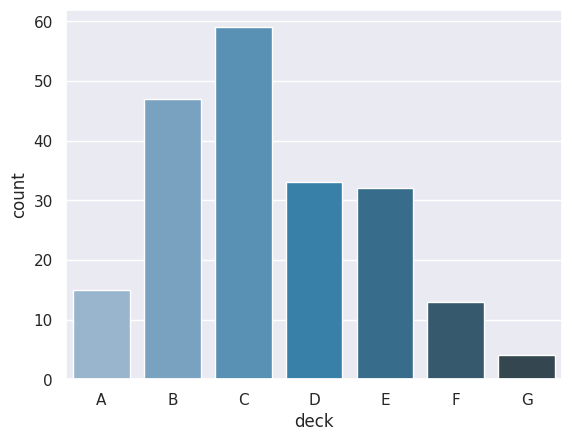

In [25]:
sns.countplot(x="deck", data=titanic, palette="PuBu_d");

How did the decks break down by class for the passengers we have data about?

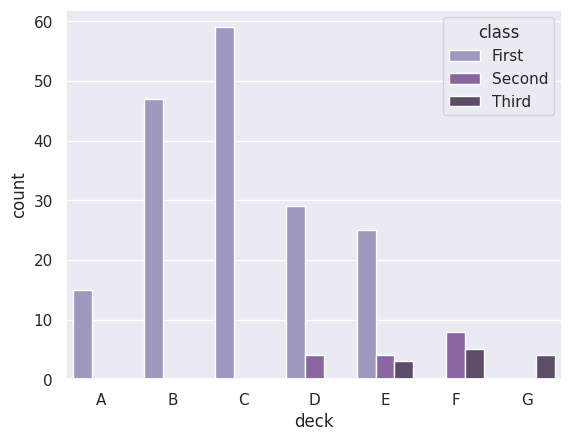

In [26]:
sns.countplot(x="deck", hue="class", data=titanic, palette="BuPu_d");

Note that we're missing a lot of deck data for the second and third class passengers, which will be important to keep in mind later.

###How much did they pay for their tickets?

Since we have data about fares, let's see how those broke down by classes.

In [27]:
#Este codigo genera error, por tanto realizo las modificaciones indicadas en los codigos subsiguientes
#from seaborn import linearmodels
#reload(linearmodels)
#reload(sns)
#sns.set(style="dark")

In [28]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.2 MB/s eta 0:00:00


In [29]:
!pip install importlib

  Preparing metadata (setup.py) ... done
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5852 sha256=44a69bc23a968e8d1ee09b755ed2f181c1f23772e0654a2e023484c0f8430295
  Stored in directory: /root/.cache/pip/wheels/0f/77/67/b2657372b2523148d81dcdd875916a417f047849169567cb2e
Successfully built importlib


In [30]:
import linearmodels

In [31]:
import importlib

In [32]:
importlib.reload(linearmodels)
importlib.reload(sns)
sns.set(style="dark")

<ipython-input-33-65e4e81b6655>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="class", y="fare", data=titanic, palette="BuPu_d");


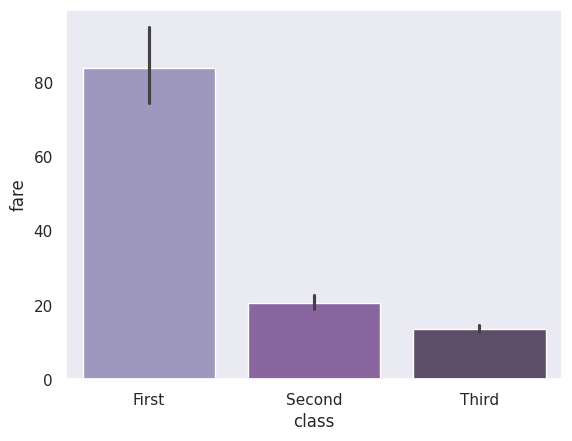

In [33]:
sns.barplot(x="class", y="fare", data=titanic, palette="BuPu_d");

In [34]:
#sns.violinplot(titanic["fare"], titanic["class"], color="BuPu_d").set_ylim(0, 600)
#sns.despine(left=True);
#este codigo genera error, se modifica por el que se muestra a continuacion

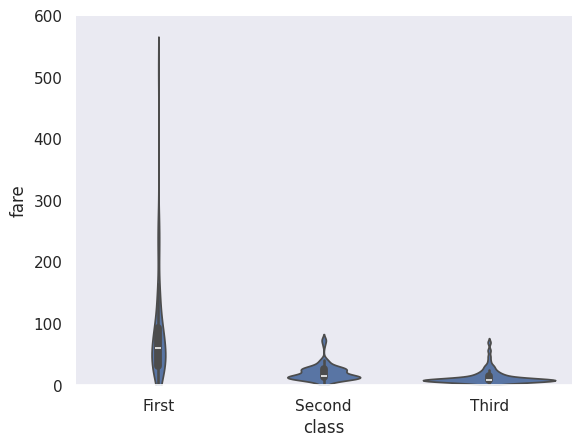

In [35]:
sns.violinplot(x="class", y="fare", data=titanic).set_ylim(0,600)
sns.despine(left=True)

La gráfica anterior presenta el valor de las tarifas pagadas por cada una de las clases de pasajero, es notabel que para el caso de la primera clase

There are some extreme outliers in the first class distribution; let's winsorize those to get a better sense for how much each class paid.

In [36]:
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f, 200))

In [37]:
#sns.violinplot(titanic["fare_winsor"], titanic["class"], color="BuPu_d").set_ylim(0, 250)
#sns.despine(left=True);

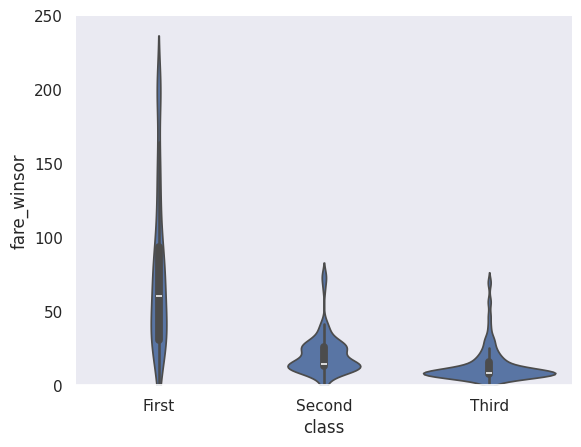

In [38]:
sns.violinplot(x="class", y="fare_winsor", data=titanic).set_ylim(0,250)
sns.despine(left=True)

La gráfica anterior presenta la distribución de las tarifas para cada una de las clases, para el caso de la primera clase, se visualliza que la mayor parte de las tarifas rondan las 60 libras, valor que representa la mediana, además hay mayor concentración de tarifas por debajo de ese valor, ya que la zona inferior es ligeramente mas ancha que la superior, cabe resaltar que el valor mínimo es cero y el maximo ronda las 240 libras aproximadamente. La caja interna indica en su extremo inferior el primer cuartil y en su extremo superior el tercer curtil, la cual agrupa el 50% de los datos de la distribución, que se puede afirmar, este oscila entre 25 y 90 libras.

------------------------

How did the fares break down by deck? Let's look both at the mean and the distribution.

In [39]:
#sns.catplot("deck", "fare", data=titanic, palette="PuBu_d");

In [40]:
!pip install seaborn

In [41]:
import seaborn as sns

In [42]:
titanic = sns.load_dataset("titanic")

<ipython-input-43-3539e7bfe2db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deck", y="fare", data=titanic, palette="BuPu_d");


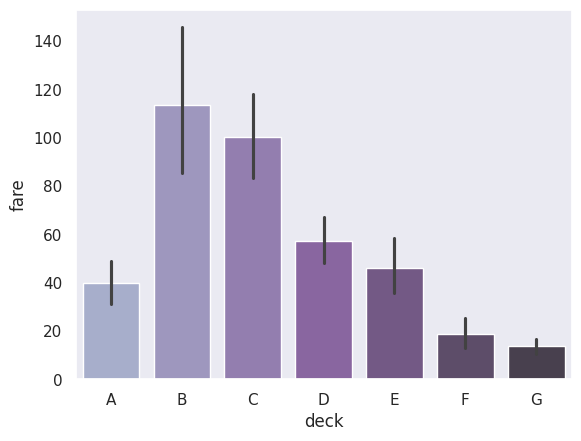

In [43]:
sns.barplot(x="deck", y="fare", data=titanic, palette="BuPu_d");

<ipython-input-44-494fc930b05b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="deck", y="fare", data=titanic, palette="PuBu_d", kind="box")


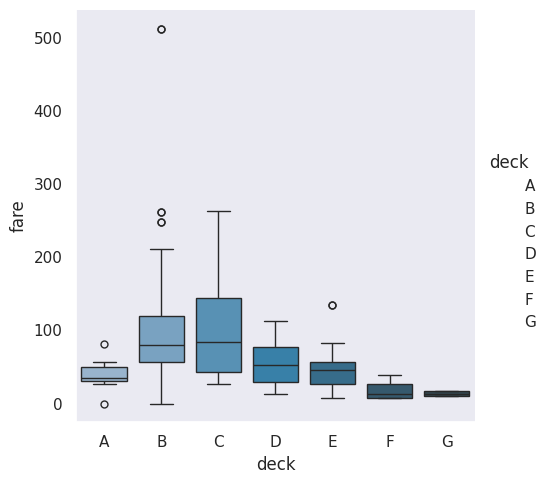

In [44]:
sns.catplot(x="deck", y="fare", data=titanic, palette="PuBu_d", kind="box")

In [45]:
#sns.violinplot(titanic["fare_winsor"], titanic["deck"], color="PuBu_d")
#sns.despine(left=True);

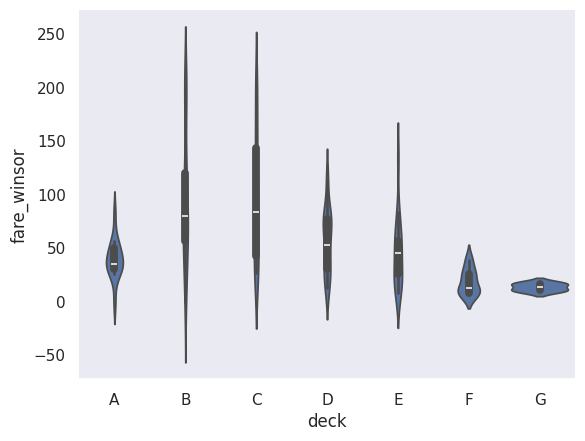

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f, 200))
# Corregir el orden de las variables en el gráfico de violín
sns.violinplot(x="deck", y="fare_winsor", data=titanic)

# Quitar los bordes izquierdos del gráfico
sns.despine(left=True)

It might make more sense to plot the median fare, since the distributions aren't normal.

<ipython-input-47-5f468c5374a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deck", y="fare", data=titanic, palette="BuPu_d", estimator=np.median);


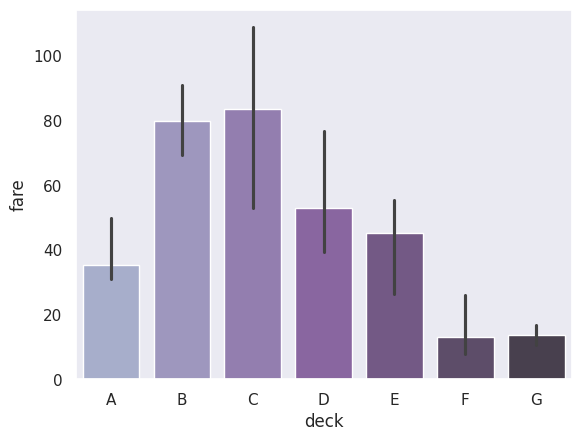

In [47]:
#sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d", estimator=np.median);
sns.barplot(x="deck", y="fare", data=titanic, palette="BuPu_d", estimator=np.median);

We can also look at a regression of fare on age to see if older passengers paid more. We'll use robust methods here too, which will accound for the skewed distribution on fare.

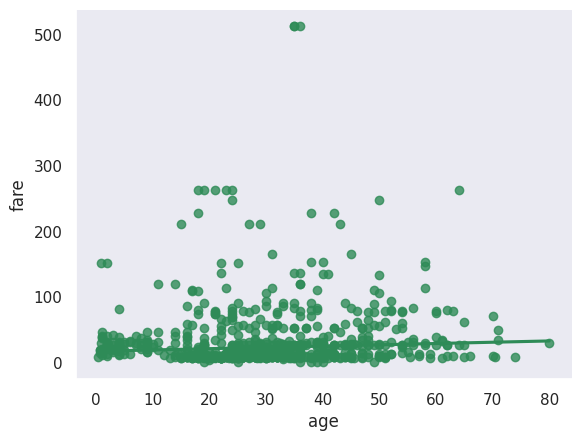

In [48]:
sns.regplot(data=titanic, x="age", y="fare", robust=True, ci=None, color="seagreen")
sns.despine();

###Where did the passengers come from?

The *Titanic* passengers embarked at one of three ports before the voyage.

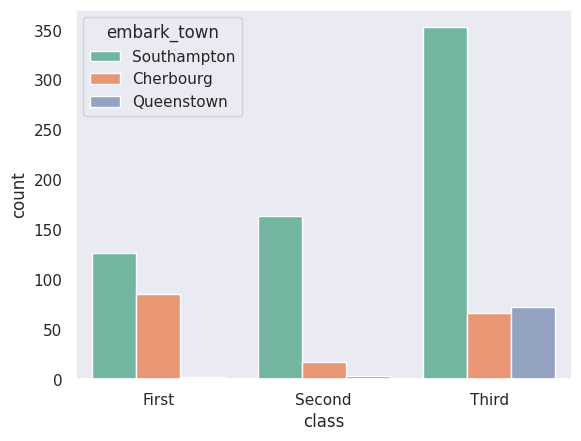

In [49]:
sns.countplot(titanic, x="class", hue="embark_town", palette="Set2");

###Who was traveling with family members?

We also have some data, although it's not coded very well, about the number of parents/children and the numbe of siblings/spouses on board for each passenger.

<Axes: xlabel='class', ylabel='count'>

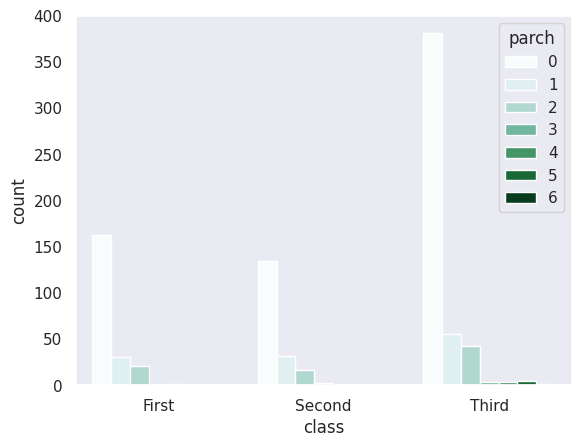

In [50]:
#sns.factorplot("class", data=titanic, hue="parch", palette="BuGn");
sns.countplot(titanic, x="class",hue="parch", palette="BuGn")

<Axes: xlabel='class', ylabel='count'>

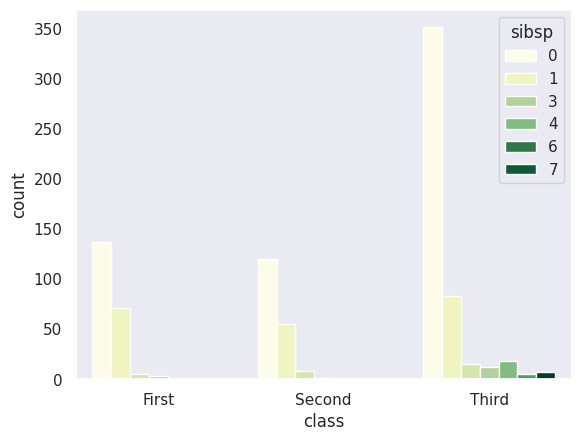

In [51]:
#sns.factorplot("class", data=titanic, hue="sibsp", palette="YlGn");
sns.countplot(titanic, x="class",hue="sibsp", palette="YlGn")

We defined a variable that just measures whether someone was traveling alone, i.e. without family.

<ipython-input-52-0549082ee098>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(titanic, x="alone", palette="Greens")


<Axes: xlabel='alone', ylabel='count'>

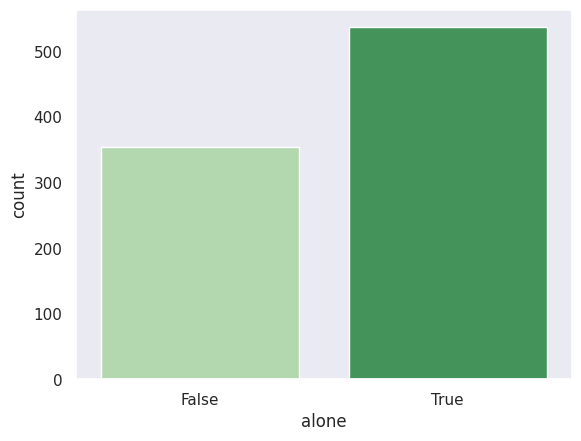

In [52]:
#sns.factorplot("alone", data=titanic, palette="Greens");
sns.countplot(titanic, x="alone", palette="Greens")

##What made people survive the sinking?

<div style="width:100%; text-align:center">
<i>Iceberg, dead ahead!</i><br><br>
<img src=http://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg width=500px>
</div>

Now that we have a feel for the characteristics of our sample, let's get down to the main question and ask what factors seem to predict whether our passengers survived. But first, one more count plot just to see how many of our passengers perished in the sinking.

<ipython-input-53-44b150da9b16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(titanic, x="alive", palette="OrRd_d")


<Axes: xlabel='alive', ylabel='count'>

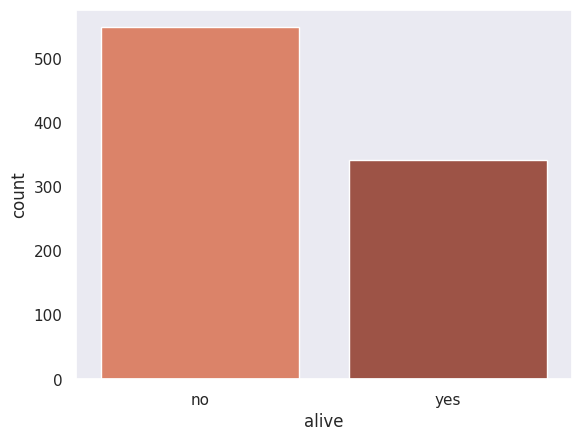

In [53]:
sns.countplot(titanic, x="alive", palette="OrRd_d")

###What classes had the survivors traveled in?

It's part of popular lore that the third-class (or steerage) passengers fared much more poorly than their wealthier shipmates. Is this borne out in the data?

[(0.0, 1.0)]

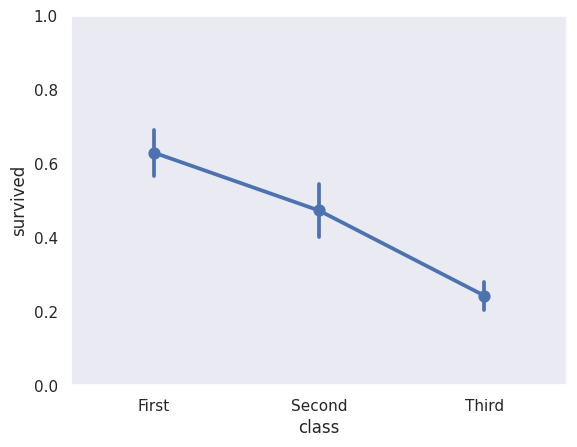

In [54]:
sns.pointplot(titanic, x="class", y="survived").set(ylim=(0, 1))

We also of course know that women were given high priority during the evacuation, and we saw above that Third class was disproportionately male. Maybe that's driving the class effect?

[(0.0, 1.0)]

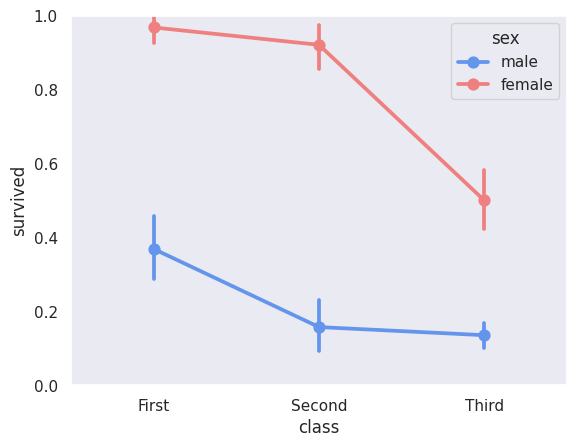

In [55]:
sns.pointplot(titanic, x="class", y="survived", hue="sex", palette=pal).set(ylim=(0, 1))

Nope, in general it was not good to be a male *or* to be in steerage.

###What effect did "women and children first" have?

Were they at least successful in evacuating the children?

In [56]:
#fg = sns.factorplot("class", "survived", data=titanic, hue="who", col="who", palette=pal, aspect=.4)
#fg.set(ylim=(0, 1))
#fg.despine(left=True)

In [57]:
import seaborn as sns
pal = sns.color_palette("hls", 8)

In [58]:
import pandas as pd
import seaborn as sns

In [59]:
titanic = sns.load_dataset("titanic")

<ipython-input-60-9a733fc2ded7>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  fg = sns.catplot(data=titanic, x="class", y="survived", hue="who", col="who", palette=pal, aspect=.4, kind='point')


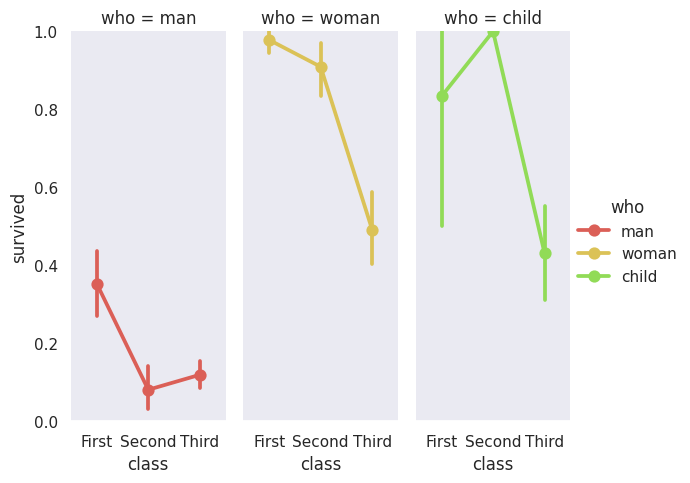

In [60]:
fg = sns.catplot(data=titanic, x="class", y="survived", hue="who", col="who", palette=pal, aspect=.4, kind='point')
fg.set(ylim=(0, 1))
fg.despine(left=True)

La gráfica anterior muestra la tasa de supervivencia (eje y) expresada en términos que van de 0 a 1, en relación a los grupos poblacionales de mujeres, hombres y menores de edad distribuidos por clases.
Cada punto representa la tasa de supervivencia para cada grupo poblacional específico por clase social.
Al realizar el análisi por cada grupo se observa que los menores de edad(child) de la segunda clase prsentan la tasa de supervivencia mas elevada (100%), seguidos por los de segunda clase (80%), sin embargo los de tercera clase presentan la tasa de supervencia mas baja(40%).

El segungo grupo con mayor tasa de supervivencia son las mujeres, de ellas aquellas ubicadas en primera y segunda clase presentan las tasas de supervivencia mas altas cercanas al 100%, en comparación a las mujeres en tercer clase cuya supervivencia es de casi el 50%.

Para el caso de los hombres, ellos presentan la tasa de supervivencia mas baja para todas las clases, para aquellos ubicados en primera clase ésta es cercana tan solo al 40%, los de tercera clase cae al 10% y los de segunda clase, presentan la tasa de supervencia mas baja, por debajo del 10%

Pretty good for first and second class (although the precise estimates are unreliable because there weren't that many children traveling in the upper classes. It's actually the case that every second-class child survived, though).

We suspect that the best way to predict survival is to look at whether a passenger was an adult male and what class he or she was in.

In [61]:
import pandas as pd
import seaborn as sns

[(0.0, 1.0)]

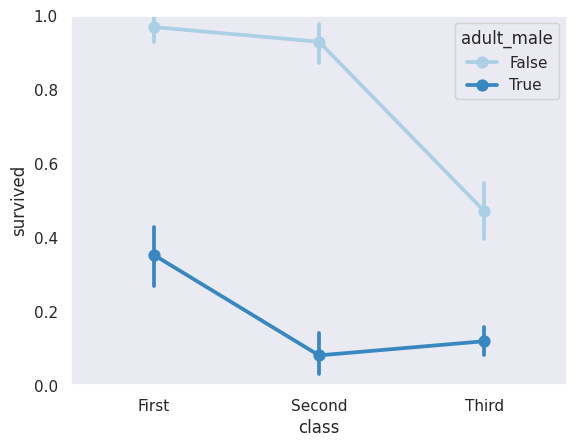

In [62]:
sns.pointplot(x="class", y="survived", data=titanic, hue="adult_male", palette="Blues").set(ylim=(0, 1))

La gráfica anterior muestra mas en detalle la tasa de supervivencia para el grupo de los hombres discriminados por clases (línea azul oscuar), en comparación a la supervivencia de los otros dos grupos poblacionales, mujeres y menores de edad (línea azul clara). Es muy notable la diferencia y queda en evidencia que la prioridad la supervivencia de los viajeros se focalizó en mujeres y menores de edad de la primera y segunda clase, cuya tasa es muy cercana al 100%

Another way to plot the same data emphasizes the different outcomes for men and other passengers even more dramatically.

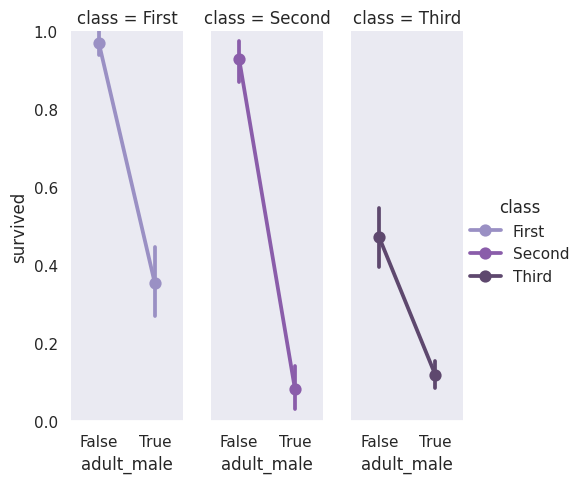

In [63]:
fg = sns.catplot(data=titanic, x="adult_male", y="survived", col="class", hue="class", aspect=.33, palette="BuPu_d", kind='point')
fg.set(ylim=(0, 1))
fg.despine(left=True);

Otra forma de presentar la comparativa de la supervivencia de los hombres con relación a la de los otros grupos de pasajeros, pero de manera más drámatica, es la que se muestra en la gráfica anterior, alli es bastante notable como la tasa de supervivencia para la segunda clase presenta indicadores extremos, mientras que el grupo de hombres alcanza tan solo un porcentaje cercano al 10%, para los resto de pasajeros en la segunda clase (menores de edad y mujeres) alcanza casi que un 10%%. Lo mismo ocurre para la primera clase en menores proporciones puesto que la tasa de supervivencia de hombres es cercana al 40% y cercana al 100% para los otros dos grupos poblacionales. Sin embargo se observa un recorte notable en la diferencia de esta tasa, para la tercera clase, cuyo indice de supervivencia continúa siendo muy bajo para los hombres (10%) y para los otros grupos poblacionales solo alcanza valores cercanos al 50%. Esta información tambien permite concluir que las acciones orientadas a salavaguardar la vida de los pasajeros se priorizaron para mujeres y menores de edad pero de la primera y segunda clase.

###Did age matter in general?

We can also ask whether age as a contiunous variable mattered. We'll draw logistic regression plots, first jittering the survival datapoints to get a sense of the distribution.

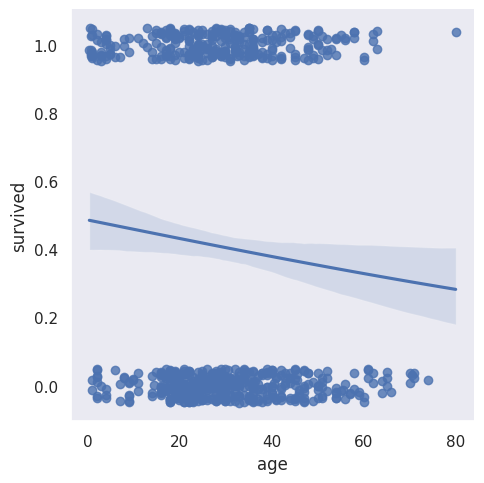

In [64]:
sns.lmplot(x="age", y="survived", data=titanic, logistic=True, y_jitter=.05)

La gráfica anterior presenta un gráfico de regresión logística, fluctuando los puntos de datos de supervivencia para tener una idea de la distribución. La gráfica presenta en el eje "x" la edad de los pasajeros de 0 a 80 años y en el eje "y" presenta la tasa de supervivencia entre 0 (baja probabilidad de supervivencia) y 1(elevada posibilidad de sobrevivir) para esas edades, por tanto los puntos en la gráfica representan los pasejeros según su edad y la ubicación de estos puntos su posibilidad de supervivencia, la dispersión de los datos muestra como varía la probabilidad de supervivencia en función de la edad, es notable una mayor concentración de los datos para las edades entre los 20 y 50 años tanto para índices de supervivencia como de no supervivencia, siendo mucho más alta esta concentracion para edades al rededor de los 30 años.

La línea de tendenicia lógistica en el centro del plano, muestra como cambia la probabilidad de supervivencia a medida que aumenta la edad, que por su dirección inclinada hacia abajo permite concluir, cómo la tasa de supervivencia disminuye con la edad.

La sombra azul claro alrededor de la línea representa el intervalo de confianza, que indica la incertidumbre asociada con la estimación de la probabilidad de supervivencia.

Lo anterior permite concluir que la edad es una variable que si influyó en las probabilidades de supervivencia de los viajeros del Titanic, y como la probabilidad de sobrevivir disminuye a medida que las personas envejecen


We can also plot the same data with the survival observations grouped into discrete bins.

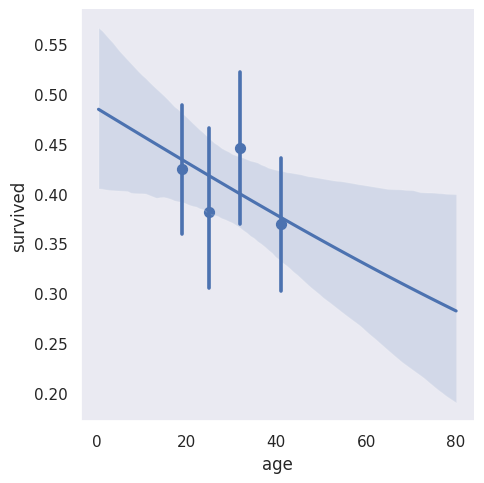

In [65]:
sns.lmplot(x="age", y="survived", data=titanic, logistic=True, x_bins=4, truncate=True);

Al agrupar las observciones de supervivencia (eje "y") agrupadas en cuatro intervalos discretos de edades (eje "x"), que además concentran la mayor cantidad de viajeros. La línea de tendencia logística corrobora la relación inversa entre edad y supervivencia, es decír a menor edad mayor tasa de supervivencia esta codición es muy notable par las edades de 20 años que presentan una tasa superior en comparación a quienes cuentan con 25 años, y éstos a su vez presentan mejores índices que las personas de 40 años, con la única exepción de las personas de 30 años que registran tasa de supervivencia superiores a los demás intervalos.

###How did age interact with sex and class?

We know that sex is important, though, so we probably want to separate out these predictions for men and women.

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

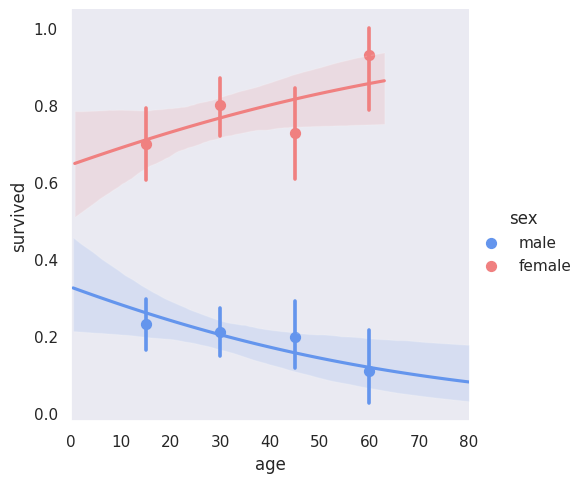

In [67]:
age_bins = [15, 30, 45, 60]
pal = {"male": "#6495ED", "female": "#F08080"}
sns.lmplot(x="age", y="survived", data=titanic, hue="sex", palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80))

Al relacionar la variable edad (eje "x") dividida en cuatro intervalos y la supervivencia (eje "y") agrupando los datos de acuerdo al género de los pasajeros, es notable que el grupo de las mujeres alcanzan tasas de supervivencias muy superires con respecto a la tasa registrada por los hombres, para todos los intervalos de edad.

Otro aspecto a destacar tiene que ver con la línea de tendencia logística de los datos, la cual para el caso de las mujeres presenta una inclinación ascendente, es decir, que hay una relación directa entre edad y supervivencia, esto es a menor edad menor tasa de supervivenci como se observa para el intervalo de los 15 años, que registra una tasa cercana al 70%, para el intervalo de los 30 años alcanza el 80% y para edades sobre los 60 años la tasa de supervivencia es cercana al 100%.

Caso opuesto se observa en para el género masculino, donde la línea de tendencia logística muestra una relación inversa edad/supervivencia, es así como a menor edad, 15 años, tasa de supervivencia superiro al 20%, y para el caso de los viajeros con edad de 60 años la posibilidad de sobrevivir se reduce al 10%.

Class is imporant too, let's see whether it interacts with the age variable as well.

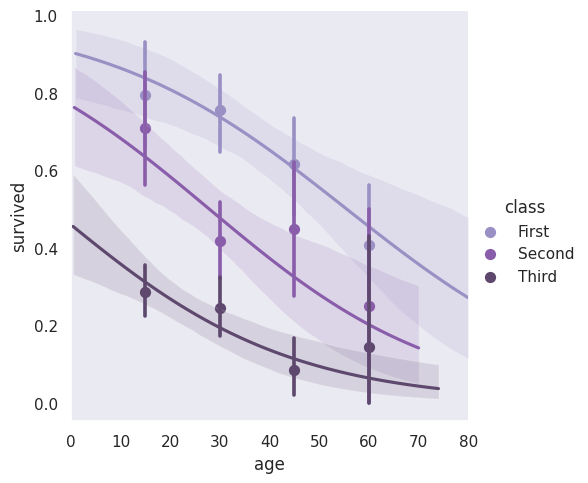

In [68]:
sns.lmplot(x="age", y="survived", data=titanic, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

Al relacionar la tasa de supervivencia con la edad y la clase de los viajeros, se presentan los siguiente resultados:

- Existe una relación directa entre supervivencia y clase social, esto es a mejor condición de clase mayores tasas de supervivencia, la gráfica muestra que para todos los intervalos de edad ubicados en primera clase se registran tasas de supervivencia mas altas, y la clase tres presenta las tasas de superiores mucho mas inferiores.
- Al vincular la variable edad con la clase social, se observa una tendencia logística descendente, es decir, a menor edad mayores tasas de supervivencia y a medida que la edad aumenta la supervivencia disminuye. Esta situación es similar para las tres clases sociales

Because the above plot is rather busy, it might make sense to split the three classes onto separate facets.

In [69]:
sns.lmplot(x="age", y="survived", data=titanic, col="class", hue="class",
           palette="BuPu_d", x_bins=4, logistic=True, size=3).set(xlim=(0, 80));

TypeError: lmplot() got an unexpected keyword argument 'size'

###Did it matter what passengers paid, or where they stayed?

We know that class matters, but we can also use the `fare` variable as a proxy for a contiuous measure of wealth.

In [ ]:
sns.lmplot("fare_winsor", "survived", titanic, x_bins=4, logistic=True, truncate=True);

Perhaps it mattered what deck each passenger's cabin was on?

In [ ]:
sns.factorplot("deck", "survived", data=titanic, palette="PuBu_d", join=False);

In [ ]:
sns.factorplot("deck", "survived", data=titanic, col="class", size=3, palette="PuBu_d", join=False);

###Did family members increase the odds of survival?

Although the way our data on family members was coded, we don't know for sure what sort of companions these passengers had, but it's worth asking how they influenced survival.

In [ ]:
sns.lmplot("parch", "survived", titanic, x_estimator=np.mean, logistic=True);

In [ ]:
sns.lmplot("parch", "survived", titanic, hue="sex", x_estimator=np.mean, logistic=True, palette=pal);

In [ ]:
sns.lmplot("sibsp", "survived", titanic, x_estimator=np.mean, logistic=True);

We also have a more interpretable `alone` variable (although it's reasonable to assume that this is going to be confounded with age).

In [ ]:
sns.factorplot("alone", "survived", data=titanic).set(ylim=(0, 1));

Did traveling alone have a greater effect depending on what class you were in?

In [ ]:
fg = sns.factorplot("alone", "survived", data=titanic, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

As above, a different presentation of the same data emphasizes different comparisons.

In [ ]:
sns.factorplot("class", "survived", data=titanic, hue="alone", palette="Greens").set(ylim=(0, 1));

What about men and women who were traveling alone?

In [ ]:
sns.factorplot("alone", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

In [ ]:
fg = sns.factorplot("alone", "survived", data=titanic, hue="sex",
                    col="class", palette=pal, aspect=.33)
fg.despine(left=True);

# **MATRIZ DE CORRELACION**

In [ ]:
import pandas as pd

In [ ]:
#titanic.head()

In [ ]:
#correlation_matrix = titanic.corr()

In [ ]:
# Select columns with int64 and float64 data types
numeric_columns = titanic.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Compute the correlation matrix for the selected columns
correlation_matrix = titanic[numeric_columns].corr()

In [ ]:
# Drop the 'fare_winsor' column
titanic_without_fare_winsor = titanic.drop(columns=["fare_winsor"])

In [ ]:
# Select columns with int64 and float64 data types
numeric_columns = titanic_without_fare_winsor.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Compute the correlation matrix for the selected columns
correlation_matrix = titanic_without_fare_winsor[numeric_columns].corr()

In [ ]:
# Display the correlation matrix
print(correlation_matrix)

In [ ]:
#Visualizar la matriz con mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation map')
plt.show()

De la gráfica de correlación se puede destacar los siguientes análisis:
- Entre la variable survived y fare, se presenta una correlación positiva 0.26, lo cual permite inferir que a medida que aumenta el valor de la tarifa, puede tender a aumentar la posibilidad de superviviencia, sin embargo la magnitud expresada en un porcentaje del 26%, sugiere una relación moderada  por estar éste más proxima a 0, que al 1. Por tanto se puede concluir que hay una tendencia relativamente moderada en esta correlación, que indicaría que aquellos que pagaron una tarifa más alta pudiesen haber tenido mayor probabilidad de sobrevivir.

- Una correlación de -0.34, entre la varialbe survived y pclass, por el signo negativo podria indicar un relación inversa entre ambas, es decir, que a medida que la variable pclass disminuye de 3 a 1 se incrementa de forma moderada el valor de la variabel survived, es decirl, la posibilidad de sobrevivir.

- Un valor de -0.37 para la correlación entre las varibles pclss y age, evidencia por el signo negativo, que a medida que disminuye la variable pclass de 3 a 1, se presenta un increment moderado (37%) en las edadades de los mismos, esto significa que los pasajeros de menor edad se ubican en la tercera clase y la primera clase agrupa a pasajeros de edades mas adultas

- Cabe destacar que la presencia de padres e hijos, identificada con la variable Parch, presenta una correlación muy baja (0.082) con respecto a la supervivencia, al igual que la variable Sibsp (Hermanos y Esposos), con una correlación de -0.035 frente a la superviviencia, lo que permite concluir que las relaciones familiares presentaron una influencia mínima en las probabilidades de supervivencia de los pasajeros


*Consultar como es el calculo de la matriz de correlacion *

The correlation matrix is a square matrix that shows the correlation coefficients between pairs of variables in a dataset. The correlation coefficient measures the strength and direction of a linear relationship between two variables.

Mathematically, the correlation coefficient between two variables X and Y is calculated using the formula:

Px,y  = ∑

To compute the correlation matrix for multiple variables, each pair of variables is analyzed, and the correlation coefficient is calculated for each pair. The resulting matrix is symmetric, with the diagonal elements being 1 (since each variable perfectly correlates with itself) and the off-diagonal elements showing the correlation coefficients between pairs of variables.

The correlation matrix provides valuable insights into the relationships between variables in a dataset, helping to identify patterns, dependencies, and potential multicollinearity issues in statistical analysis.